# Import necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import MinMaxScaler
#To import different metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule
import random
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from  tensorflow.keras.optimizers import SGD

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


#Import Shap
import shap


#Scipy functions
from scipy.stats import randint, uniform

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

# Load data

In [2]:
All = pd.ExcelFile('allData.xls')
data = pd.read_excel(All, 'Data')
data

,Number,Data source,Selected,Mix number in literature,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),...,Annual average temperature of exposed environment (Celsius degree),Annual wetting times/rainy days of exposed environment (d),Annual average precipitation of exposed environment (mm),Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size,Note
0,NaN,2. Yunusa 2014,NaN,PC-40,0.0,0.0,450.0,0.0,0.0,0.0,...,24.3,0.0,0.0,30.0,75.93,NaN,NaN,3.139,NaN,No significant effect of initial water curing ...
1,NaN,2. Yunusa 2014,NaN,PC-50,0.0,0.0,400.0,0.0,0.0,0.0,...,24.3,0.0,0.0,60.0,64.50,NaN,NaN,4.022,NaN,NaN
2,NaN,2. Yunusa 2014,NaN,PC-60,0.0,0.0,350.0,0.0,0.0,0.0,...,24.3,0.0,0.0,100.0,49.23,NaN,NaN,6.670,NaN,NaN
3,NaN,2. Yunusa 2014,NaN,PC-75,0.0,0.0,300.0,0.0,0.0,0.0,...,24.3,0.0,0.0,140.0,36.00,NaN,NaN,7.945,NaN,NaN
4,NaN,2. Yunusa 2014,NaN,FA-40,0.0,0.0,315.0,0.0,135.0,0.0,...,24.3,0.0,0.0,40.0,62.80,NaN,NaN,6.052,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,NaN,"J48. Farahani, 2015",NaN,W3-4,350.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.550,NaN,150*150*150,NaN
1984,NaN,"J48. Farahani, 2015",NaN,W4-1,380.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.375,NaN,150*150*150,NaN
1985,NaN,"J48. Farahani, 2015",NaN,W4-2,370.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,150*150*150,NaN
1986,NaN,"J48. Farahani, 2015",NaN,W4-3,360.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.500,NaN,150*150*150,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 34 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Number                                                              0 non-null      float64
 1   Data source                                                         1988 non-null   object 
 2   Selected                                                            194 non-null    object 
 3   Mix number in literature                                            1988 non-null   object 
 4   ASTM type 1 ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 5   CEM I 42.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 6   CEM I 52.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 7   Class C Fly ash

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTM type 1 ordinary Portland Cement content (kg/m^3),1988.0,39.317656,106.825528,0.00,0.000000,0.000000,0.000000,702.0000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),1988.0,95.567020,146.591457,0.00,0.000000,0.000000,210.000000,547.0000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),1988.0,147.092807,152.375401,0.00,0.000000,155.000000,280.000000,660.0000
Class C Fly ash content (kg/m^3),1988.0,6.120221,28.791545,0.00,0.000000,0.000000,0.000000,225.0000
Class F Fly ash content (kg/m^3),1988.0,35.497918,65.744896,0.00,0.000000,0.000000,56.500000,544.0000
Slag content (kg/m^3),1988.0,34.629970,73.837709,0.00,0.000000,0.000000,0.000000,440.0000
Silica fume content (kg/m^3),1988.0,7.592819,21.082168,0.00,0.000000,0.000000,0.000000,150.0000
Water content (kg/m^3),1988.0,172.241112,28.371606,105.00,153.000000,170.000000,186.000000,295.0000
Superplasticizer content (kg/m^3),1988.0,2.335606,4.726357,0.00,0.000000,0.000000,2.702500,35.1000


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

Number                                                                1988
Data source                                                              0
Selected                                                              1794
Mix number in literature                                                 0
ASTM type 1 ordinary Portland Cement content (kg/m^3)                    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)                    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)                    0
Class C Fly ash content (kg/m^3)                                         0
Class F Fly ash content (kg/m^3)                                         0
Slag content (kg/m^3)                                                    0
Silica fume content (kg/m^3)                                             0
Water content (kg/m^3)                                                   0
Superplasticizer content (kg/m^3)                                        0
Maximum coarse aggregate 

In [7]:
Excess_col_indices =list(range(0, 4)) + list(range(20, 27)) + [33]
semi_df = data.iloc[:, [col for col in range(data.shape[1]) if col not in Excess_col_indices]]
semi_df

,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Maximum coarse aggregate size (mm),...,Curing method,Curing temperature (Celsius degree),Curing humidity (%),Curing day,Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size
0,0.0,0.0,450.0,0.0,0.0,0.0,0.0,180.0,4.00,20.0,...,Submerged,20.0,100.0,3.0,30.0,75.93,NaN,NaN,3.139,NaN
1,0.0,0.0,400.0,0.0,0.0,0.0,0.0,200.0,3.25,20.0,...,Submerged,20.0,100.0,3.0,60.0,64.50,NaN,NaN,4.022,NaN
2,0.0,0.0,350.0,0.0,0.0,0.0,0.0,210.0,0.00,20.0,...,Submerged,20.0,100.0,3.0,100.0,49.23,NaN,NaN,6.670,NaN
3,0.0,0.0,300.0,0.0,0.0,0.0,0.0,225.0,0.00,20.0,...,Submerged,20.0,100.0,3.0,140.0,36.00,NaN,NaN,7.945,NaN
4,0.0,0.0,315.0,0.0,135.0,0.0,0.0,180.0,1.75,20.0,...,Submerged,20.0,100.0,3.0,40.0,62.80,NaN,NaN,6.052,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,350.0,0.0,0.0,0.0,0.0,0.0,50.0,180.0,2.00,20.0,...,Submerged,21.0,100.0,28.0,NaN,NaN,NaN,1.550,NaN,150*150*150
1984,380.0,0.0,0.0,0.0,0.0,0.0,20.0,200.0,0.80,20.0,...,Submerged,21.0,100.0,28.0,NaN,NaN,NaN,3.375,NaN,150*150*150
1985,370.0,0.0,0.0,0.0,0.0,0.0,30.0,200.0,1.20,20.0,...,Submerged,21.0,100.0,28.0,NaN,NaN,NaN,1.000,NaN,150*150*150
1986,360.0,0.0,0.0,0.0,0.0,0.0,40.0,200.0,1.80,20.0,...,Submerged,21.0,100.0,28.0,NaN,NaN,NaN,0.500,NaN,150*150*150


# Feature Engineering 

## Quick fix

In [8]:
filtered_row = semi_df[semi_df['Average 28-day compressive strength (Mpa)'] > 400]

if len(filtered_row) == 1:
    value_to_divide = filtered_row['Average 28-day compressive strength (Mpa)'].values[0]
    updated_value = value_to_divide / 10

    # Update the value in the DataFrame
    semi_df.loc[semi_df['Average 28-day compressive strength (Mpa)'] > 400, 'Average 28-day compressive strength (Mpa)'] = updated_value
else:
    print("No rows or multiple rows matching the condition.")

semi_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ASTM type 1 ordinary Portland Cement content (kg/m^3),1988.0,39.317656,106.825528,0.00,0.000000,0.000000,0.000000,702.000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),1988.0,95.567020,146.591457,0.00,0.000000,0.000000,210.000000,547.000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),1988.0,147.092807,152.375401,0.00,0.000000,155.000000,280.000000,660.000
Class C Fly ash content (kg/m^3),1988.0,6.120221,28.791545,0.00,0.000000,0.000000,0.000000,225.000
Class F Fly ash content (kg/m^3),1988.0,35.497918,65.744896,0.00,0.000000,0.000000,56.500000,544.000
Slag content (kg/m^3),1988.0,34.629970,73.837709,0.00,0.000000,0.000000,0.000000,440.000
Silica fume content (kg/m^3),1988.0,7.592819,21.082168,0.00,0.000000,0.000000,0.000000,150.000
Water content (kg/m^3),1988.0,172.241112,28.371606,105.00,153.000000,170.000000,186.000000,295.000
Superplasticizer content (kg/m^3),1988.0,2.335606,4.726357,0.00,0.000000,0.000000,2.702500,35.100
Maximum coarse aggregate size (mm),1988.0,18.122485,3.828674,9.50,16.000000,20.000000,20.000000,30.000


## Curing method

In [9]:
num_df = semi_df.select_dtypes(include=np.number)
obj_df = semi_df.select_dtypes(include=['object'])

In [10]:
for col in obj_df.columns:
    value_counts = obj_df[col].value_counts()
    print(f"Column '{col}':")
    print(value_counts)
    print()

Column 'Curing method':
Submerged    837
Moist        503
Sealed       456
Air          184
Name: Curing method, dtype: int64

Column 'Specimen size':
150*150*150    461
200h*100r      215
100*100*100    158
100*100*300     22
300h*150r       12
100h*100r        5
Name: Specimen size, dtype: int64


In [11]:
semi_df['Curing method'].isnull().sum()

8

In [12]:
missing = semi_df['Curing method'].isnull()
semi_df[missing]

,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Maximum coarse aggregate size (mm),...,Curing method,Curing temperature (Celsius degree),Curing humidity (%),Curing day,Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size
1946,0.0,450.0,0.0,0.0,0.0,0.0,0.0,171.0,5.130,9.5,...,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN
1947,0.0,405.0,0.0,0.0,0.0,0.0,45.0,171.0,5.850,9.5,...,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN
1948,0.0,337.5,0.0,0.0,0.0,112.5,0.0,171.0,5.850,9.5,...,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN
1949,0.0,292.5,0.0,0.0,0.0,112.5,45.0,171.0,5.895,9.5,...,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN
1950,0.0,225.0,0.0,0.0,0.0,225.0,0.0,171.0,5.400,9.5,...,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN
1951,0.0,180.0,0.0,0.0,0.0,225.0,45.0,171.0,5.850,9.5,...,NaN,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN
1952,0.0,135.0,0.0,0.0,0.0,315.0,0.0,171.0,4.230,9.5,...,NaN,NaN,NaN,NaN,155.0,NaN,NaN,NaN,NaN,NaN
1953,0.0,90.0,0.0,0.0,0.0,315.0,45.0,171.0,5.850,9.5,...,NaN,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN,NaN


In [13]:
semi_df = semi_df.dropna(subset = ['Curing method'])
semi_df['Curing method'].isnull().sum()

0

In [14]:
new_df = semi_df.copy()
new_df = pd.concat([semi_df, pd.get_dummies(semi_df['Curing method'])], axis=1)
new_df.head()

,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Maximum coarse aggregate size (mm),...,Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size,Air,Moist,Sealed,Submerged
0,0.0,0.0,450.0,0.0,0.0,0.0,0.0,180.0,4.00,20.0,...,30.0,75.93,NaN,NaN,3.139,NaN,0,0,0,1
1,0.0,0.0,400.0,0.0,0.0,0.0,0.0,200.0,3.25,20.0,...,60.0,64.50,NaN,NaN,4.022,NaN,0,0,0,1
2,0.0,0.0,350.0,0.0,0.0,0.0,0.0,210.0,0.00,20.0,...,100.0,49.23,NaN,NaN,6.670,NaN,0,0,0,1
3,0.0,0.0,300.0,0.0,0.0,0.0,0.0,225.0,0.00,20.0,...,140.0,36.00,NaN,NaN,7.945,NaN,0,0,0,1
4,0.0,0.0,315.0,0.0,135.0,0.0,0.0,180.0,1.75,20.0,...,40.0,62.80,NaN,NaN,6.052,NaN,0,0,0,1


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1987
Data columns (total 26 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1980 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1980 non-null   float64
 5   Slag content (kg/m^3)                                  1980 non-null   float64
 6   Silica fume content (kg/m^3)                           1980 non-null   float64
 7   Water content (kg/m^3)                                 1980 non-null   float64
 8   Superplasticizer content (kg/m^3)               

In [16]:
new_df = new_df.drop(['Curing humidity (%)', 'Curing day','Slump (mm)', 'Chloride diffusion coefficient (10-12 m2/s)', 'Average 28-day split strength (Mpa)', 'Average 28-day compressive strength (Mpa)', 'Curing method', 'Specimen size',], axis = 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1987
Data columns (total 18 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1980 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1980 non-null   float64
 5   Slag content (kg/m^3)                                  1980 non-null   float64
 6   Silica fume content (kg/m^3)                           1980 non-null   float64
 7   Water content (kg/m^3)                                 1980 non-null   float64
 8   Superplasticizer content (kg/m^3)               

In [17]:
new_df = new_df.dropna()
new_df.isnull().sum()

ASTM type 1 ordinary Portland Cement content (kg/m^3)    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)    0
Class C Fly ash content (kg/m^3)                         0
Class F Fly ash content (kg/m^3)                         0
Slag content (kg/m^3)                                    0
Silica fume content (kg/m^3)                             0
Water content (kg/m^3)                                   0
Superplasticizer content (kg/m^3)                        0
Maximum coarse aggregate size (mm)                       0
Coarse aggregate content (kg/m^3)                        0
Fine aggregate content (kg/m^3)                          0
Curing temperature (Celsius degree)                      0
Average carbonation coefficient (mm/year^0.5)            0
Air                                                      0
Moist                                                    0
Sealed                                                  

# Train-test split

In [18]:
X = new_df.drop('Average carbonation coefficient (mm/year^0.5)', axis=1)
Y = new_df[['Average carbonation coefficient (mm/year^0.5)']]

In [19]:
X_big, X_test, y_big, y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42,shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_big,y_big, test_size = 0.2, random_state = 42,shuffle = True)

In [20]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(788, 17)
(197, 17)
(110, 17)


## Min Max Scaler

In [21]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

# Model evaluation

* MAE, MSE, R-square, and Adjusted R-square

In [22]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))
def model_performance_regression(predictors,target,pred):
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

# Model 1

In [23]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [24]:
model = Sequential()
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))

model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4321 (16.88 KB)
Trainable params: 4321 (16.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
optimizer = RMSprop( learning_rate=0.001)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 10ms/step - loss: 10.1615 - mae: 2.3451 - val_loss: 8.5442 - val_mae: 2.1413
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 6.2630 - mae: 1.9207 - val_loss: 7.3060 - val_mae: 1.9611
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 5.6232 - mae: 1.8122 - val_loss: 6.7108 - val_mae: 1.8307
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 5.1727 - mae: 1.7221 - val_loss: 6.2072 - val_mae: 1.7262
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 4.7210 - mae: 1.6524 - val_loss: 6.0001 - val_mae: 1.6283
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 4.4604 - mae: 1.5960 - val_loss: 5.6223 - val_mae: 1.5660
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 4.1437 - mae: 1.5375 - val_loss: 5.1322 - val_mae: 1.5020
Epoch 8/50
25/25 [==============================] - 0s 5ms/step - loss: 3.9039 - mae: 1.

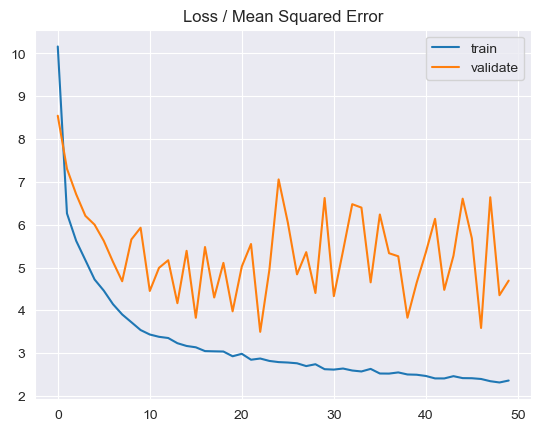

In [26]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [27]:
y_result = model.predict(X_val_scaled)
print("Validation Performance\n")
ANN_train = model_performance_regression(X_val_scaled,y_val, y_result)
ANN_train

7/7 [==============================] - 0s 1ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,2.166537,1.587813,0.451792,0.399727


In [28]:
y_test_result = model.predict(X_test_scaled)
ANN_test = model_performance_regression(X_test_scaled, y_test, y_test_result)
print("Test set Performance\n")
ANN_test

4/4 [==============================] - 0s 3ms/step
Test set Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,2.396613,1.827099,0.290018,0.158825


# Model 2 (Early stopping)

In [29]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [30]:
# Initializing the model
model_ES = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_ES.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_ES.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_ES.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_ES.add(Dense(1, activation='linear'))

model_ES.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4321 (16.88 KB)
Trainable params: 4321 (16.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Initializing the Optimizer
optimizer = Adam(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_ES.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_ES = model_ES.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50,callbacks=es_cb)

Epoch 1/50
25/25 [==============================] - 1s 8ms/step - loss: 12.9403 - mae: 2.6764 - val_loss: 9.6879 - val_mae: 2.2176
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 6.9041 - mae: 2.0585 - val_loss: 7.8781 - val_mae: 2.1491
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 6.1254 - mae: 1.9026 - val_loss: 7.0819 - val_mae: 1.9737
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 5.6668 - mae: 1.8128 - val_loss: 6.4081 - val_mae: 1.8440
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 5.2127 - mae: 1.7397 - val_loss: 6.1921 - val_mae: 1.7448
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 4.8593 - mae: 1.6777 - val_loss: 5.6962 - val_mae: 1.6546
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 4.5100 - mae: 1.6259 - val_loss: 5.1802 - val_mae: 1.5507
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 4.1249 - mae: 1.5

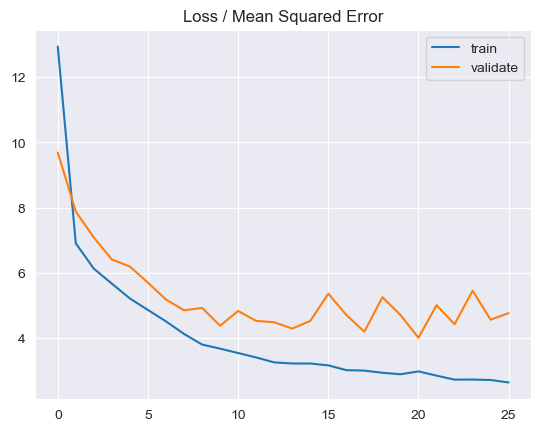

In [32]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_ES.history['loss'], label='train')
plt.plot(history_ES.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [33]:
y_result_ES = model_ES.predict(X_val_scaled)
print("Validation Performance\n")
ES_train = model_performance_regression(X_val_scaled,y_val, y_result_ES)
ES_train

7/7 [==============================] - 0s 2ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,2.182744,1.60378,0.443559,0.390713


In [34]:
y_result_ES_test = model_ES.predict(X_test_scaled)
print("Test set Performance\n")
ES_test = model_performance_regression(X_test_scaled,y_test, y_result_ES_test)
ES_test

4/4 [==============================] - 0s 1ms/step
Test set Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,2.270068,1.657738,0.363015,0.245311


* Better than model 1

# Model 3 (Dropout with early stop)

In [35]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [36]:
model_DO = Sequential()
model_DO.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))
# Adding Dropout with 20%
model_DO.add(Dropout(0.2))
model_DO.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_DO.add(Dropout(0.2))
model_DO.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_DO.add(Dense(1, activation='linear'))

model_DO.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4321 (16.88 KB)
Trainable params: 4321 (16

In [37]:
optimizer = Adam(0.001)
model_DO.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
history_DO = model_DO.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50,callbacks=es_cb)

Epoch 1/50
25/25 [==============================] - 1s 9ms/step - loss: 12.9100 - mae: 2.6644 - val_loss: 9.9285 - val_mae: 2.2216
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 7.9157 - mae: 2.1637 - val_loss: 8.0840 - val_mae: 2.1172
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 7.1161 - mae: 2.0376 - val_loss: 7.5866 - val_mae: 1.9947
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 6.4777 - mae: 1.9472 - val_loss: 6.8667 - val_mae: 1.9084
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 6.1107 - mae: 1.8606 - val_loss: 6.9940 - val_mae: 1.8797
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 5.9819 - mae: 1.8666 - val_loss: 6.3447 - val_mae: 1.8092
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 5.7337 - mae: 1.8209 - val_loss: 5.8469 - val_mae: 1.7411
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 5.6156 - mae: 1.8

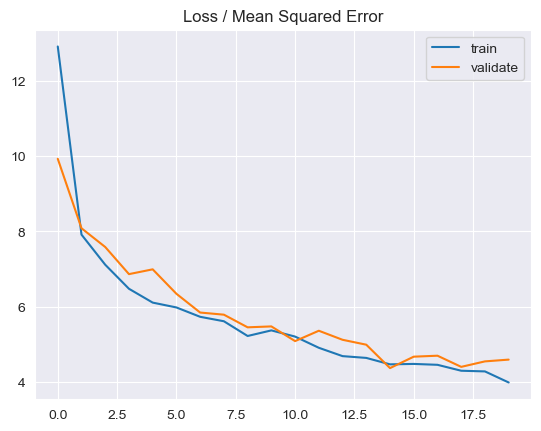

In [38]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_DO.history['loss'], label='train')
plt.plot(history_DO.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [39]:
y_result_DO = model_DO.predict(X_val_scaled)
print("Validation Performance\n")
DO_train = model_performance_regression(X_val_scaled,y_val, y_result_DO)
DO_train

7/7 [==============================] - 0s 2ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,2.14415,1.441259,0.463063,0.412069


In [40]:
y_result_DO_test = model_DO.predict(X_test_scaled)
print("Test set Performance\n")
DO_test = model_performance_regression(X_test_scaled,y_test, y_result_DO_test)
DO_test

4/4 [==============================] - 0s 0s/step
Test set Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,2.116742,1.458152,0.446156,0.343816


* Better than model 2

# Model 4 (Batch Normalization)

In [41]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [42]:
# Initializing the model
model_BN = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_BN.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_BN.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding Batch Normalization
model_BN.add(BatchNormalization())
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_BN.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_BN.add(Dense(1, activation='linear'))

model_BN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4449 (17.38 KB)
Trainable params: 4385 (17.13 KB)
Non-trainable params: 64 (256.00 Byte)
___________________

In [43]:
# Initializing the Optimizer
optimizer = Adam(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_BN.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_BN = model_BN.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50,callbacks=es_cb)

Epoch 1/50
25/25 [==============================] - 1s 10ms/step - loss: 11.3246 - mae: 2.4895 - val_loss: 16.8301 - val_mae: 2.9686
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 6.2833 - mae: 1.8242 - val_loss: 13.5802 - val_mae: 2.5565
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 4.8540 - mae: 1.6321 - val_loss: 12.0095 - val_mae: 2.3847
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 4.1116 - mae: 1.5043 - val_loss: 11.3545 - val_mae: 2.3275
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 3.5072 - mae: 1.3846 - val_loss: 10.3412 - val_mae: 2.2043
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 3.3902 - mae: 1.3638 - val_loss: 9.8844 - val_mae: 2.1705
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 3.0923 - mae: 1.3110 - val_loss: 9.1531 - val_mae: 2.0705
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 2.9185 - ma

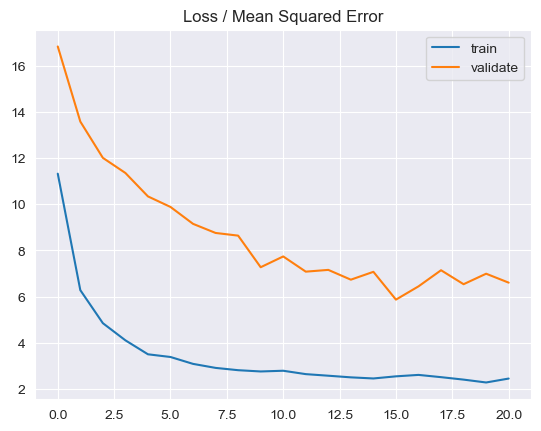

In [44]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_BN.history['loss'], label='train')
plt.plot(history_BN.history['val_loss'], label='validate')
plt.legend()
plt.show()

* Trash

In [45]:
y_result_BN = model_BN.predict(X_val_scaled)
print("Validation Performance\n")
BN_train = model_performance_regression(X_val_scaled,y_val, y_result_BN)
BN_train

7/7 [==============================] - 0s 2ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,2.57059,1.944195,0.228246,0.154951


In [46]:
y_result_BN_test = model_BN.predict(X_test_scaled)
print("Test set Performance\n")
BN_train = model_performance_regression(X_test_scaled,y_test, y_result_BN_test)
BN_train

4/4 [==============================] - 0s 3ms/step
Test set Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,2.75284,2.163756,0.063272,-0.109819


# Model 5 (Model 3 with deeper layers)

In [47]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [48]:
model_Final = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_Final.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))
# Adding dropout with ratio of 0.2
model_Final.add(Dropout(0.2))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_Final.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding dropout with ratio of 0.1
model_Final.add(Dropout(0.1))
# Adding the second hidden layer with 16 neurons, relu as activation function and, he_uniform as weight initializer
model_Final.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the third hidden layer with 8 neurons, relu as activation function and, he_uniform as weight initializer
model_Final.add(Dense(8, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_Final.add(Dense(1, activation='linear'))

model_Final.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9

In [49]:
# Initializing the Optimizer
optimizer = Adam(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_Final.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
# Adding the callbacks
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_Final = model_Final.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50,callbacks=es_cb)

Epoch 1/50
25/25 [==============================] - 1s 9ms/step - loss: 17.4533 - mae: 3.2911 - val_loss: 15.2137 - val_mae: 2.7528
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 9.8166 - mae: 2.2825 - val_loss: 8.7102 - val_mae: 2.1215
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 7.0961 - mae: 2.0655 - val_loss: 7.8667 - val_mae: 2.1096
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 6.5197 - mae: 1.9673 - val_loss: 7.5141 - val_mae: 2.0127
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 6.4358 - mae: 1.9307 - val_loss: 7.2683 - val_mae: 1.9546
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 5.9666 - mae: 1.8807 - val_loss: 6.9224 - val_mae: 1.9031
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 5.6600 - mae: 1.8118 - val_loss: 6.5357 - val_mae: 1.8515
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 5.5190 - mae: 1.

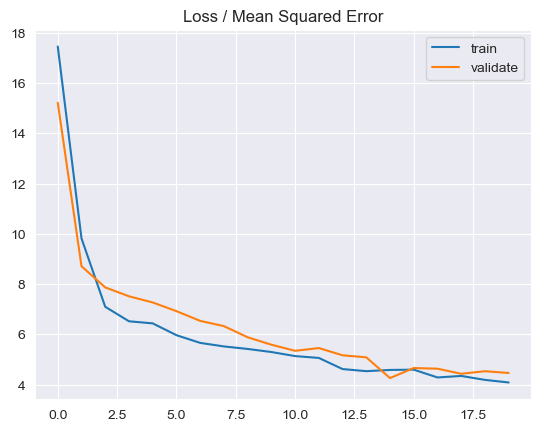

In [50]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_Final.history['loss'], label='train')
plt.plot(history_Final.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [51]:
y_result_final = model_Final.predict(X_val_scaled)
print("Validation Performance\n")
final_train = model_performance_regression(X_val_scaled,y_val, y_result_final)
final_train

7/7 [==============================] - 0s 2ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,2.112465,1.389342,0.478815,0.429317


In [52]:
y_result_final_test = model_Final.predict(X_test_scaled)
print("Validation Performance\n")
final_test = model_performance_regression(X_test_scaled,y_test, y_result_final_test)
final_test

4/4 [==============================] - 0s 0s/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,2.141031,1.472488,0.433372,0.32867


# Summary

In [53]:
models_train_comp_df = pd.concat(
    [
        ANN_train.T,
        ES_train.T,
        DO_train.T,
        BN_train.T,
        final_train.T
    ],
    axis=1,
)

models_train_comp_df.columns = [
    'ANN',
    'Early drop',
    'Dropout',
    'Batch Normalization',
    'Final'
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,ANN,Early drop,Dropout,Batch Normalization,Final
RMSE,2.166537,2.182744,2.144150,2.752840,2.112465
MAE,1.587813,1.603780,1.441259,2.163756,1.389342
R-squared,0.451792,0.443559,0.463063,0.063272,0.478815
Adj. R-squared,0.399727,0.390713,0.412069,-0.109819,0.429317


In [54]:
models_test_comp_df = pd.concat(
    [
        ANN_test.T,
        ES_test.T,
        DO_test.T,
        ANN_test.T,
        final_test.T
    ],
    axis=1,
)

models_test_comp_df.columns = [
    'ANN',
    'Early drop',
    'Dropout',
    'Batch Normalization',
    'Final'
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,ANN,Early drop,Dropout,Batch Normalization,Final
RMSE,2.396613,2.270068,2.116742,2.396613,2.141031
MAE,1.827099,1.657738,1.458152,1.827099,1.472488
R-squared,0.290018,0.363015,0.446156,0.290018,0.433372
Adj. R-squared,0.158825,0.245311,0.343816,0.158825,0.328670


# Hyperparameter tuning

In [55]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [56]:
# Define the function to create the model
def create_model(activation, neurons, optimizer, learning_rate, dropout, batch_normalization):
    model = Sequential()
    model.add(Dense(neurons[0], activation=activation, kernel_initializer='he_uniform', input_shape=(14,)))

    if batch_normalization:
        model.add(BatchNormalization())

    if dropout > 0:
        model.add(Dropout(dropout))

    for i in range(1, len(neurons)):
        model.add(Dense(neurons[i], activation=activation, kernel_initializer='he_uniform'))

        if batch_normalization:
            model.add(BatchNormalization())

        if dropout > 0:
            model.add(Dropout(dropout))

    model.add(Dense(1, activation='linear'))

    if optimizer == 'SGD':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'Adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'RMSprop':
        opt = RMSprop(learning_rate=learning_rate)

    model.compile(loss='mse', optimizer=opt, metrics=['mae'], batch_size=64)

    return model

In [57]:
# Define the parameter distribution for random search
param_dist = {
    'activation': ['relu', 'tanh', 'sigmoid'],
    'hidden_layer_sizes': [(128, 32, 32), (64, 32, 32, 16), (128, 32, 16, 8), (64,32,32)],
    'solver': ['sgd', 'adam', 'rmsprop'],
    'learning_rate_init': uniform(0.001),
    'batch_size':[64, 'auto', 128, None],
    'alpha': uniform(0.0001, 0.001),
    'max_iter': [100, 200],
    'early_stopping': [True, False],

}

# Create the MLPRegressor estimator
model = MLPRegressor()

# Perform random search cross-validation
random = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='neg_mean_squared_error', n_iter=50, cv=10)
random_result = random.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the corresponding performance
best_params = random_result.best_params_
best_score = np.sqrt(-random_result.best_score_)
print("Best Parameters:", best_params)
print("Best RMSE:", best_score)

Best Parameters: {'activation': 'tanh', 'alpha': 0.0008122705899244421, 'batch_size': 64, 'early_stopping': True, 'hidden_layer_sizes': (64, 32, 32), 'learning_rate_init': 0.037886947354532796, 'max_iter': 100, 'solver': 'adam'}
Best RMSE: 1.9389184799967851


In [58]:
Tuned_NN = random.best_estimator_
Tuned_NN.fit(X_train_scaled, y_train)
Tuned_nn_train = Tuned_NN.predict(X_val_scaled)
tuned_nn_train = model_performance_regression(X_val_scaled, y_val, Tuned_nn_train)
tuned_nn_train

,RMSE,MAE,R-squared,Adj. R-squared
0,2.357874,1.80662,0.350686,0.28902


# Overall results

In [59]:
X_scaled = scaler.fit_transform(X)

In [60]:
y_pred = model_Final.predict(X_scaled)
df_predictions = pd.DataFrame({'True Values': Y.values.flatten(), 'Predicted Values': y_pred.flatten()})
df_predictions

35/35 [==============================] - 0s 1ms/step


,True Values,Predicted Values
0,3.139000,1.331611
1,4.022000,2.483894
2,6.670000,4.387738
3,7.945000,6.380233
4,6.052000,3.571696
...,...,...
1090,5.281004,5.266081
1091,3.573374,4.637841
1092,6.988634,5.281170
1093,3.288769,4.072167


In [61]:
df_predictions['Difference'] = df_predictions['True Values'] - df_predictions['Predicted Values']
df_predictions

,True Values,Predicted Values,Difference
0,3.139000,1.331611,1.807389
1,4.022000,2.483894,1.538106
2,6.670000,4.387738,2.282262
3,7.945000,6.380233,1.564767
4,6.052000,3.571696,2.480304
...,...,...,...
1090,5.281004,5.266081,0.014922
1091,3.573374,4.637841,-1.064467
1092,6.988634,5.281170,1.707464
1093,3.288769,4.072167,-0.783398


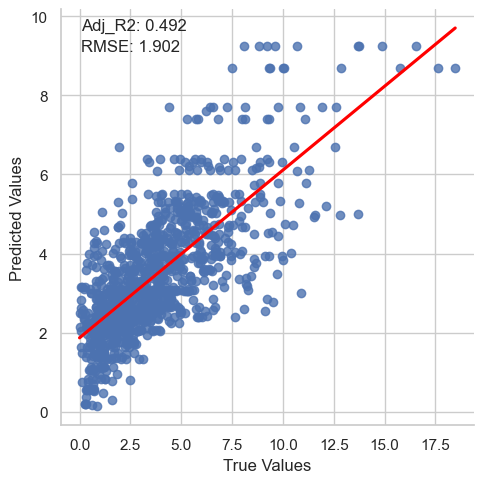

In [62]:
r2 = r2_score(df_predictions['True Values'], df_predictions['Predicted Values'])
adj_r2 = adj_r2_score(X_scaled, Y, y_pred)
rmse = mean_squared_error(df_predictions['True Values'], df_predictions['Predicted Values'], squared=False)

# Create the lmplot
sns.set(style="whitegrid")
lm_plot = sns.lmplot(data=df_predictions, x='True Values', y='Predicted Values', ci=True, line_kws={'color': 'red'})

# Annotate the plot with R2 and RMSE
plt.text(0.05, 0.95, f'Adj_R2: {adj_r2:.3f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.9, f'RMSE: {rmse:.3f}', transform=plt.gca().transAxes)

# Display the plot
plt.show()